# web2dataset


Web2dataset is a modulable library built to easily create image dataset from google image and other.
You can find the docs [here](https://samsja.github.io/web2dataset/)

Web2datast it's:

* Easily create dataset from the web to train your own models for you own task
* Clean them 
* Modulable library that will allow sharing of cleaner and downloader

## Install

```shell
pip install git+https://github.com/samsja/web2dataset.git@master
```

## How to use

let's perform a simple research on google image to search for 5 bike images

In [ ]:
# hide
%load_ext autoreload
%autoreload 2

Example, how to scrap google image for image of red bike in 2 lines

In [ ]:
# hide
import shutil

shutil.rmtree("/tmp/my_search", ignore_errors=True)

In [ ]:
from web2dataset.downloader import GoogleImageDownloader

downloader = GoogleImageDownloader("/tmp/my_search").download("a red bike", 16)

Output()

let's load the downloaded image

In [ ]:
!tree "/tmp/my_search"

/tmp/my_search
├── dataset.bin
└── images
    ├── 5708eb0a-9e6e-11ec-8ec7-645d865124e9.jpg
    ├── 570c22b6-9e6e-11ec-8ec7-645d865124e9.jpg
    ├── 570dd1ec-9e6e-11ec-8ec7-645d865124e9.jpg
    ├── 570f39ce-9e6e-11ec-8ec7-645d865124e9.jpg
    ├── 57109d00-9e6e-11ec-8ec7-645d865124e9.jpg
    ├── 57121edc-9e6e-11ec-8ec7-645d865124e9.jpg
    ├── 57136076-9e6e-11ec-8ec7-645d865124e9.jpg
    ├── 5714d906-9e6e-11ec-8ec7-645d865124e9.jpg
    ├── 57162de2-9e6e-11ec-8ec7-645d865124e9.jpg
    ├── 5717ab72-9e6e-11ec-8ec7-645d865124e9.jpg
    ├── 5718ea32-9e6e-11ec-8ec7-645d865124e9.jpg
    ├── 571a622c-9e6e-11ec-8ec7-645d865124e9.jpg
    ├── 571be138-9e6e-11ec-8ec7-645d865124e9.jpg
    ├── 571d7002-9e6e-11ec-8ec7-645d865124e9.jpg
    ├── 571eefb8-9e6e-11ec-8ec7-645d865124e9.jpg
    └── 57203c7e-9e6e-11ec-8ec7-645d865124e9.jpg

1 directory, 17 files


In [ ]:
from docarray import DocumentArray

with open("/tmp/my_search/dataset.bin", "rb") as f:
    docs = DocumentArray.from_bytes(f.read())

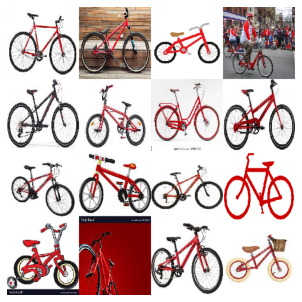

In [ ]:
def load_img(d):
    d.uri = f"/tmp/my_search/{d.uri}"
    d.load_uri_to_image_tensor()
    return d


docs = docs.apply(load_img)
docs.plot_image_sprites()

In [ ]:
# hide
shutil.rmtree("/tmp/my_search", ignore_errors=True)

And you can parelellize in one additional line

In [ ]:
from web2dataset.downloader import GoogleImageDownloader
from web2dataset.paralel import ParalelDownload

paralel_downloader = ParalelDownload(
    "/tmp/my_search", GoogleImageDownloader, num_worker=2
)
paralel_downloader.download(["a red bike","a blue bike"], 8)

Output()

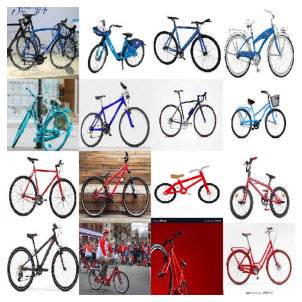

In [ ]:
from docarray import DocumentArray

with open("/tmp/my_search/dataset.bin", "rb") as f:
    docs = DocumentArray.from_bytes(f.read())

docs = docs.apply(load_img)
docs.plot_image_sprites()

In [ ]:
# hide
shutil.rmtree("/tmp/my_search", ignore_errors=True)

## How to contribute

this project is built with [nbdev](https://github.com/fastai/nbdev)

first clone the repo

> ```git clone https://github.com/samsja/web2dataset```

then install poetry
> ```pip install poetry```

then install the dev dependencies with poetry in a virtualenv

> ```poetry install```

then activate the virtual env
> ```poetry shell```

 first install the git hooks
 > ```nbdev_install_git_hooks```

then launch jupyter and code :)
> ```jupyter lab```


test your code with
> nbdev_test_nbs

finaly built the py files with nbdev and the docs
>```nbdev_build_lib```

> ```nbdev_build_docs```

you are goot to go and submit your PR :)